# Project: Investigate a Dataset (IMDB Movies Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and alot <br>
<h4>here we will try to answer some questions about this data </h4>
<ol>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>what is the top 10 movies that achieve the highest revenue?</li>
<li>Popularity VS counts of high and low runtime</li>
<li>Is there a relation between budget and popularity?</li>
<li>Is there a relation between revenue and popularity?</li>    
<li>Counts of movies in each year</li>
<li>Release Year Vs Popularity</li>
</ol>

In [1]:
# import modules that we use 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# read the data file and show the first 3 rows 
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# print data information to show summary about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# how much cols have missing value and how much value in each col 
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (handling missing values and dytpe)
as we observe the data issues there is a lot of missing values but there are columns that we didn't use and it isn't valuable for our analysis such as homepage, tagline, and keywords we drop that columns

In [5]:
# before any edit we just copy the dataset 
df_new = df.copy()

In [6]:
# drop the cols that have alot of missing value and we didn't use it 
colsdrop = ['homepage','tagline','keywords']
df_new.drop(colsdrop, axis=1, inplace=True)
df_new.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
#ckeck for duplicated rows 
df_new.duplicated().sum()

1

In [8]:
#drop duplicated and check after dropping 
df_new.drop_duplicates(inplace=True)
df_new.duplicated().sum()

0

In [9]:
# how much cols have missing value and how much value in each col 
df_new.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

 in the imdb_id ther is 10 rows with missing value instead of dropping or serch from IMDB website i suggest easy way
 i replace this values with `0` and that is mean `not provided` before i split data of this col and convert it to integer 

In [10]:
df_new['imdb_id'].fillna('notgiven0',inplace=True)
df_new['imdb_id'] = df_new['imdb_id'].str.extract('(\d+)').astype(int)

with all missing value in cols `['Cast','director','Genres','production_companies','overview']` we can search for the missing values on internet and replace it but in this project i think that is not the scope so i just replace the missing values with `Not Provided`

In [11]:
cols = ['cast','director','genres','production_companies','overview']
df_new[cols[0]].fillna('Not Provided',inplace=True)
df_new[cols[1]].fillna('Not Provided',inplace=True)
df_new[cols[2]].fillna('Not Provided',inplace=True)
df_new[cols[3]].fillna('Not Provided',inplace=True)
df_new[cols[4]].fillna('Not Provided',inplace=True)

In [12]:
df_new.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10865 non-null  int32  
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10865 non-null  object 
 7   director              10865 non-null  object 
 8   overview              10865 non-null  object 
 9   runtime               10865 non-null  int64  
 10  genres                10865 non-null  object 
 11  production_companies  10865 non-null  object 
 12  release_date          10865 non-null  object 
 13  vote_count            10865 non-null  int64  
 14  vote_average          10865 non-null  float64
 15  release_year       

In [14]:
# convert release_date time to datetime object  
df_new['release_date'] = pd.to_datetime(df['release_date'])
# not important i did not use it 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?)

In [15]:
# group by the data by release_year and get most popular genres
most_popu = df_new.groupby('release_year')['popularity','genres','release_year'].max() 
most_popu.head()

<ipython-input-15-4267c021acde>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_popu = df_new.groupby('release_year')['popularity','genres','release_year'].max()


,popularity,genres,release_year
release_year,,,
1960,2.610362,Thriller|Music|Comedy|Crime,1960
1961,2.631987,Western|Action|Adventure,1961
1962,3.170651,Western|Action|Adventure|Drama,1962
1963,2.508235,Romance|Comedy|Drama,1963
1964,3.153791,Western|Action,1964


In [16]:
#combine genres and release year and make it index to facilitates the plot
most_popu['Genres Over Years'] = most_popu.genres.str.cat(most_popu.release_year.astype(str))
most_popu = most_popu.set_index('Genres Over Years')
#after combine and set the index drop release_year to did not show in plot
most_popu.drop('release_year',axis = 1 , inplace = True)
most_popu.head()

,popularity,genres
Genres Over Years,,
Thriller|Music|Comedy|Crime1960,2.610362,Thriller|Music|Comedy|Crime
Western|Action|Adventure1961,2.631987,Western|Action|Adventure
Western|Action|Adventure|Drama1962,3.170651,Western|Action|Adventure|Drama
Romance|Comedy|Drama1963,2.508235,Romance|Comedy|Drama
Western|Action1964,3.153791,Western|Action


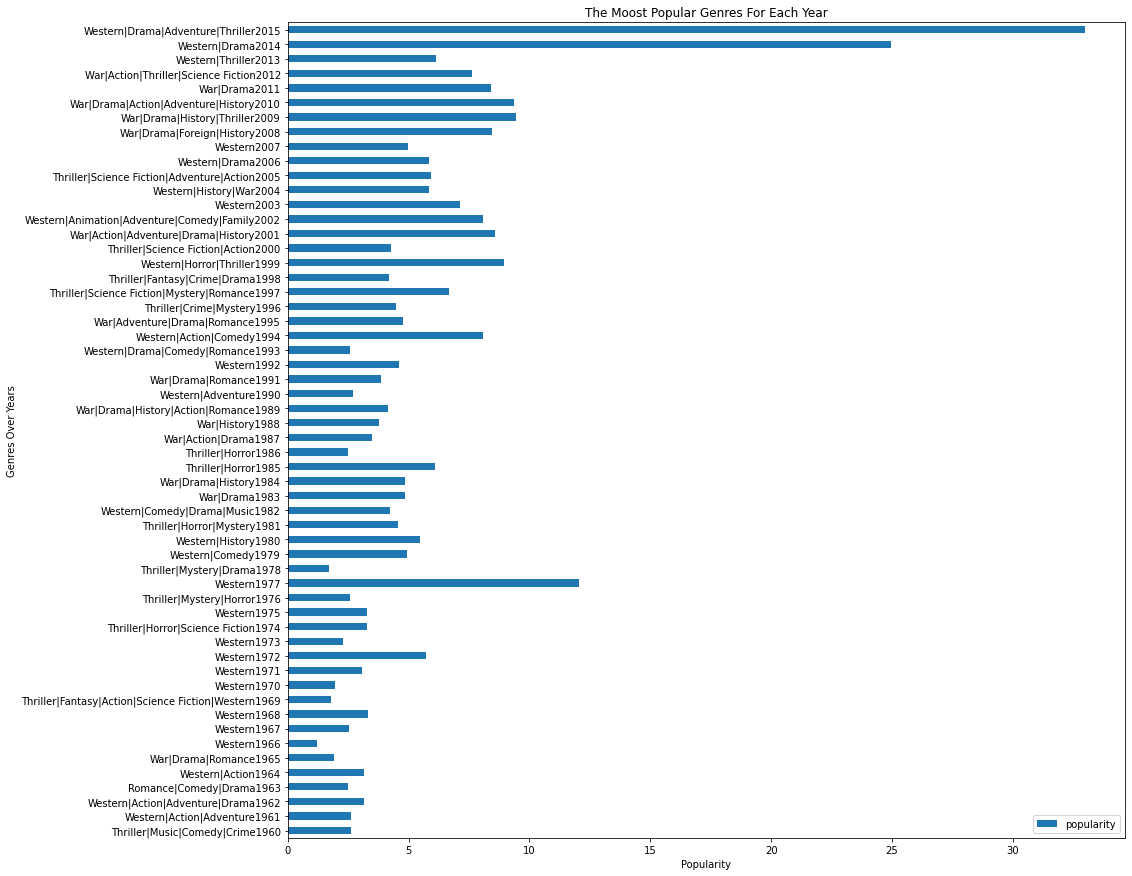

In [17]:
# plot the data 
most_popu.plot(kind='barh',figsize=(15,15) )
plt.title('The Moost Popular Genres For Each Year')
plt.xlabel('Popularity')
plt.legend();

The popularity in 2014 and 2015 has seen a huge boom and peopel more like western, drama, adventure and thriller genres 

_________________________________________________

### Research Question 2 (What kinds of properties are associated with movies that have high revenues?)
i work on Top 20 high revenues movies 

In [18]:
# get the top 20 movies with high revenues 
high_rev_data = df_new.sort_values(by='revenue',ascending=False).head(20)


In [19]:
# print the shape of new dataframe 
high_rev_data.shape

(20, 18)

print `hist` for all columns in new dataset to show what is the common with all 20 rows 

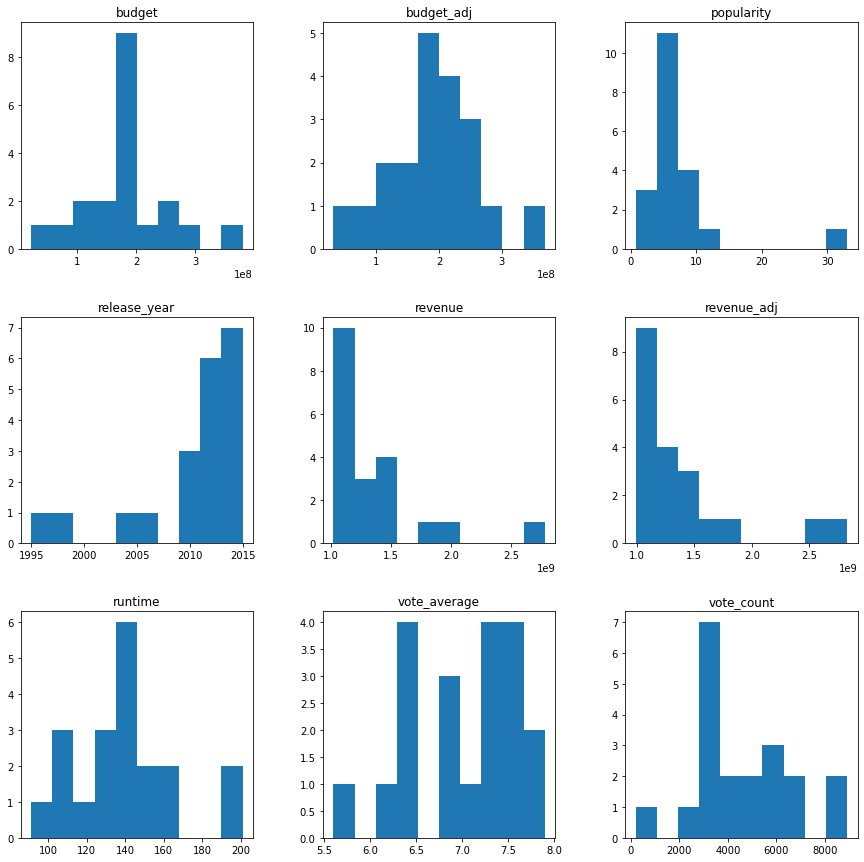

In [20]:
high_rev_data.drop(['id','imdb_id'],axis = 1 , inplace =True) # drop columns that we will not want to show in hist
high_rev_data.hist(figsize=(15,15),grid = False);

-Most of movies that its buget between 100 M to 300 M make higher revenues<br>
-Most of movies that has highest revenues it is released from 2010 <br>
-Most of top 20 movies makes revenues between 1B to 2B <br>
-Most of movies that has highest revenues it has more than 140 minutes durations <br>

_________________________________________________

### Research Question 3 (what is the top 10 movies that achieve the highest revenue?)

In [21]:
# make a function that plot a bar-graph 
def barPlot(locations,heights,labels,colors='',title='',xlabel='',ylabel='',rotation=0):
    '''
        This Function Plot a bargraph 
        
        arguments:
            locations : list - X axis
            heights : Values - Y axis
            labels : titles on x axis 
            colors : the color of gragh
            title : Title of graph
            xlabel : Title on x axis 
            ylabel : Title on Y axis
            rotation : The rotation degree for (labels)
    '''
    plt.bar(locations,height=heights,color = colors,tick_label=labels)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

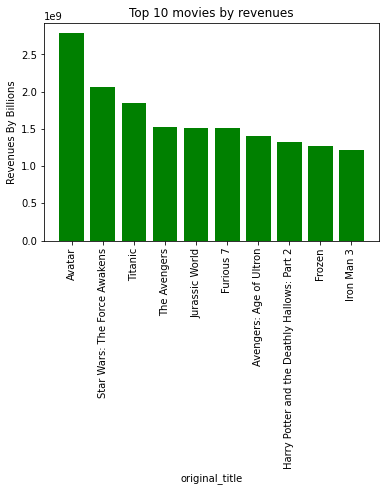

In [22]:
barPlot(range(0,10),high_rev_data['revenue'].head(10),high_rev_data['original_title'].head(10),
       'g','Top 10 movies by revenues','original_title','Revenues By Billions',rotation=90)

AVATAR film gain a huge revenue and there is a huge defference in revenue between first(AVATAR) an tenth (IRON MAN 3)

_________________________________________________

### Research Question 4 (Popularity VS counts of high and low runtime)

before all we should split runtime to 2 category `(Low,High)`<br>
**low** -> smaller than median <br>
**high** -> bigger than or equal to median

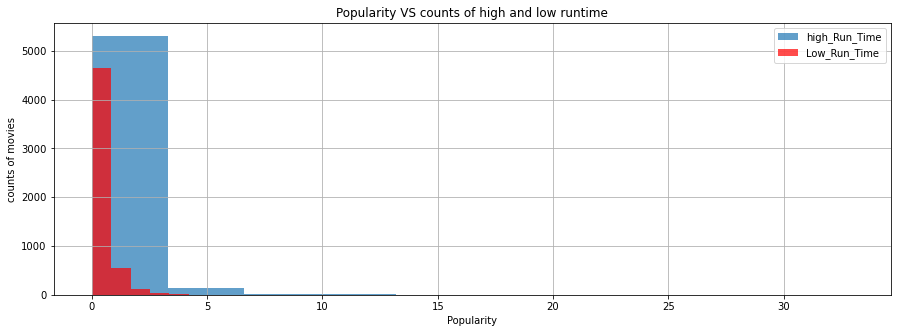

In [23]:
low_run = df_new['runtime'] < df_new['runtime'].median()
high_run = df_new['runtime'] >= df_new['runtime'].median()
df_new.popularity[high_run].hist(label = 'high_Run_Time',alpha = 0.7,figsize=(15,5))
df_new.popularity[low_run].hist(label = 'Low_Run_Time',alpha = 0.7 ,color = 'r',figsize=(15,5))
plt.title('Popularity VS counts of high and low runtime')
plt.xlabel('Popularity')
plt.ylabel('counts of movies')
plt.legend();

It seems that the high run time movies achieve more popularity 

_________________________________________________

### Research Question 5 (Is there a relation between budget and popularity?)

In [24]:
df_new.describe()
# because the dudget col have alot of values with 0 i make a new dataframe to categorize movies with low and high budget

,id,imdb_id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,9.406451e+05,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.042611e+06,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000000e+00,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,1.126060e+05,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,4.198430e+05,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,1.558250e+06,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,6.019206e+06,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
new_df = df_new[df_new['budget']>0]
low_bud = new_df[new_df['budget'] < new_df['budget'].median()]
high_bud = new_df[new_df['budget'] >= new_df['budget'].median()]

In [26]:
mean_low_bud = low_bud['popularity'].mean()
mean_high_bud = high_bud['popularity'].mean()

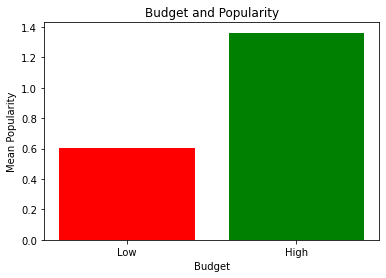

In [27]:
barPlot([1,2],[mean_low_bud,mean_high_bud],['Low','High'],['r','g'],'Budget and Popularity','Budget','Mean Popularity')

It seams in `Budget and Popularity` plot that movies with high budget have high popularity

_________________________________________________

### Research Question 6 (Is there a relation between revenue and popularity?)

In [28]:
low_rev = new_df[new_df['revenue'] < new_df['revenue'].median()]
high_rev = new_df[new_df['revenue'] >= new_df['revenue'].median()]

In [29]:
mean_low_rev = low_rev['popularity'].mean()
mean_high_rev = high_rev['popularity'].mean()

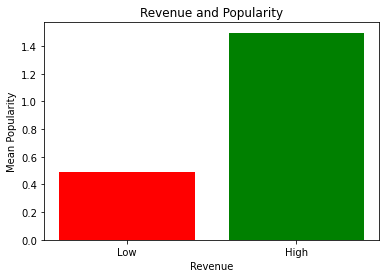

In [30]:
barPlot([1,2],[mean_low_rev,mean_high_rev],['Low','High'],['r','g'],'Revenue and Popularity','Revenue','Mean Popularity')

In `Revenue and Popularity` plot, movies that achieve high revenue have a high popularity

_________________________________________________

### Research Question 7 (Counts of movies in each year)

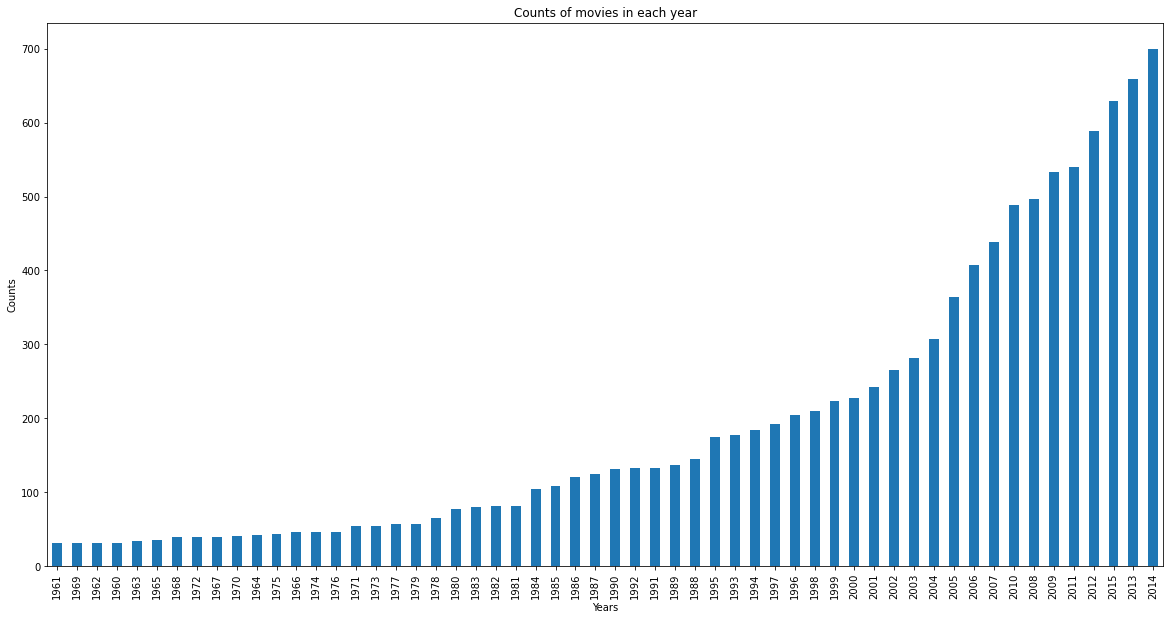

In [31]:
# count the number of movies in each year and plot it as bar plot 
df_new['release_year'].value_counts().sort_values().plot(kind='bar',figsize = (20,10))
plt.title('Counts of movies in each year')
plt.xlabel('Years')
plt.ylabel('Counts');

The large number of movies released in 2014 

_________________________________________________

### Research Question 8(Release year Vs Popularity)

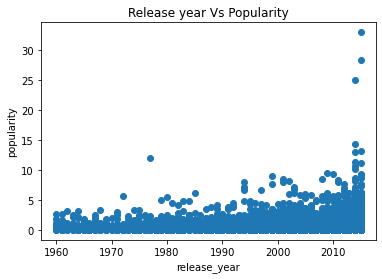

In [32]:
# plot a scatter plot between release year and popularity of movies
plt.scatter(x = df_new['release_year'],y = df_new['popularity'])
plt.title('Release year Vs Popularity')
plt.xlabel('release_year')
plt.ylabel('popularity');

movies that released in 2014 and 2015 has highest popularity 


____________________________________________________________

<a id='conclusions'></a>
## Conclusions

   ### Result
<ol>
<li>2015 the most popular genres is Western|Drama|Adventure|Thriller</li>
<li>Approximately from 2010 to 2015 there are the most popular movies </li>
<li>in 2015 there are 7 movies that achieving the highest revenue</li>
<li>in the `Genres Over Years` plot on this page you found Which genres are the most popular genres from year to year</li>
<li>in the `Top 10 movies by revenues` plot we found the Top 10 movies that achieve the highest revenue</li>
<li>`Popularity VS counts of high and low runtime` it shows that movies with high runtime make high popularity </li>
<li>it seems in the `Budget and Popularity` plot that movies with a high budget gain high popularity</li>
<li>in the `Revenue and Popularity` plot, movies that achieve high revenue have high popularity </li>
<li>The film industry has been intrigued over the years, The year 2014 is the largest year in which the number of films has been made</li>
</ol>

### limitation
<ol>
<li>there is a lot of categorical data which does not allow for a high level of statistical method</li>
<li>columns like budget and revenue have a lot of 0 value that make my analysis, not accurate 100 %</li> 
<li>There are so many nulls in the various columns that it made me stay away from parsing them like the production_companies column</li>
</ol>